**временные ряды и модели ARIMA**

Евгений Борисов <esborisov@sevsu.ru>

-----

Дмитрий Макаров   Временные ряды.    
https://www.dmitrymakarov.ru/intro/time-series-20/

Евгений Рябенко Прогнозирование временных рядов.     
https://www.youtube.com/watch?v=u433nrxdf5k

-----

In [1]:
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%precision 3
np.set_printoptions(precision=2)
np.set_printoptions(linewidth=110)
# np.get_printoptions()

# загружаем данные

AirPassengers.csv

https://drive.google.com/file/d/1yfw6gcgmJXCtxkjC69ekUvsEtAiYTlST/view?usp=share_link

https://huggingface.co/spaces/Anniek/Time_series_forecast/raw/main/AirPassengers.csv

In [3]:
# читаем данные
url = 'https://huggingface.co/spaces/Anniek/Time_series_forecast/raw/main/AirPassengers.csv'
df = pd.read_csv(url).convert_dtypes()
display(df.info())
display(df.describe().T)
display(df.sample(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    string
 1   #Passengers  144 non-null    Int64 
dtypes: Int64(1), string(1)
memory usage: 2.5 KB


None

,count,mean,std,min,25%,50%,75%,max
#Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


,Month,#Passengers
140,1960-09,508
12,1950-01,115
57,1953-10,211


In [4]:
df['ts'] = pd.to_datetime(df['Month'])
df = df.set_index('ts')
df = df[['#Passengers']]
display(df.sample(3))

,#Passengers
ts,
1960-08-01,606
1953-07-01,264
1949-02-01,118


# анализ данных

In [5]:
# 1. визуальная оценка графика ряда

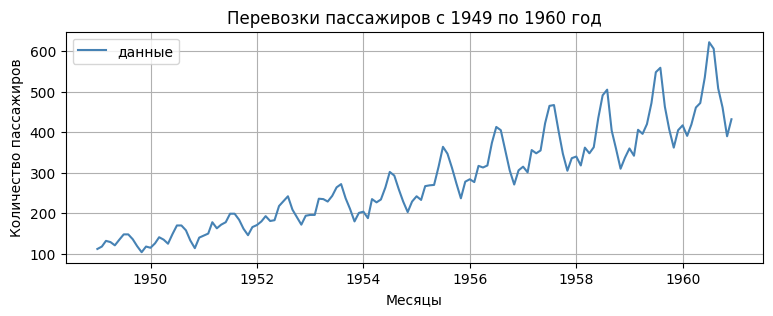

In [6]:
fig,ax = plt.subplots(figsize = (9,3))
ax.plot(df['#Passengers'], label = 'данные', color = 'steelblue')
#ax.plot(df['#Passengers'].rolling(window=12).mean(), label = 'скользящее среднее (12 месяцев)', color = 'orange')
ax.set_xlabel('Месяцы', )
ax.set_ylabel('Количество пассажиров',)
ax.set_title('Перевозки пассажиров с 1949 по 1960 год', )
ax.legend(title = '', loc = 'upper left', )
ax.grid()

In [7]:
# 2. стабилизируем дисперсию (Бокс-Кокс)

In [8]:
from scipy.special import boxcox

df['bcx'] = boxcox( df['#Passengers'],0 )

# from scipy.special import inv_boxcox
# df['bcx_inv'] = inv_boxcox(df['bc'],0)

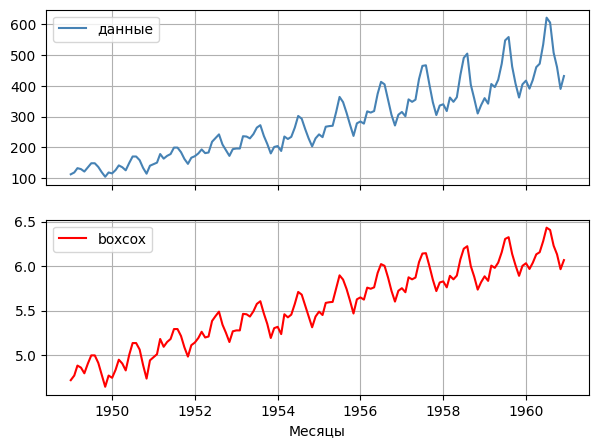

In [9]:
fig,ax = plt.subplots(2,1, figsize = (7,5),sharex=True)
ax[0].plot(df['#Passengers'], label = 'данные', color = 'steelblue')
ax[0].legend(title = '', loc = 'upper left', )
ax[0].grid()

ax[1].plot(df['bcx'], label = 'boxcox', color = 'red')
ax[1].legend(title = '', loc = 'upper left', )
ax[1].set_xlabel('Месяцы', )
ax[1].grid()

In [10]:
# оценка сезонности

In [11]:
# !pip install statsmodels

In [12]:
S = 12

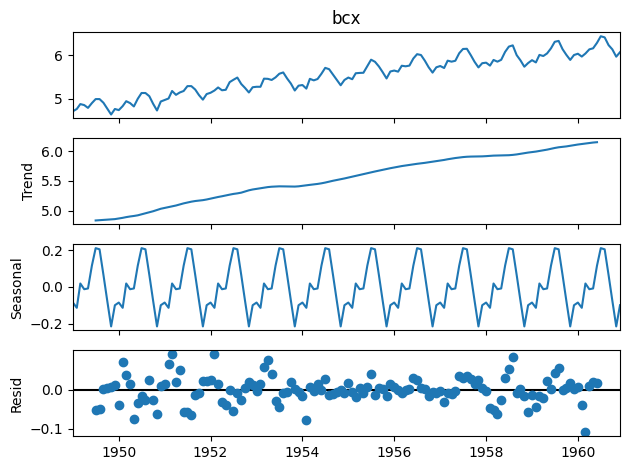

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['bcx'])
decompose.plot()
plt.show()

In [14]:
# 3. преобразуем в стационарный, подбираем порядок дифференцирования d,D (критерий Дики-Фуллера) 

In [15]:
# d,D (количество дифференцирований) выбираем минимально необходимое для стационарности ряда 

In [16]:
# Проверка временного ряда на стационарность
#     тест Дики-Фуллера (Dickey-Fuller test)

from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df['bcx'])
print('p-value = ' + str(adf_test[1]))

p-value = 0.4223667747703874


In [17]:
# дифференцирование
df['dif'] = df['bcx'].diff()#.diff().diff()
df['dif_s'] = df['bcx'].diff(periods=S)

In [18]:
d,D = 1,1

In [19]:
adf_test = adfuller(df['dif'].fillna(0.))
print('p-value = ' + str(adf_test[1]))

p-value = 0.07859381719564043


In [20]:
adf_test = adfuller(df['dif_s'].fillna(0.))
print('p-value = ' + str(adf_test[1]))

p-value = 0.009417182340649867


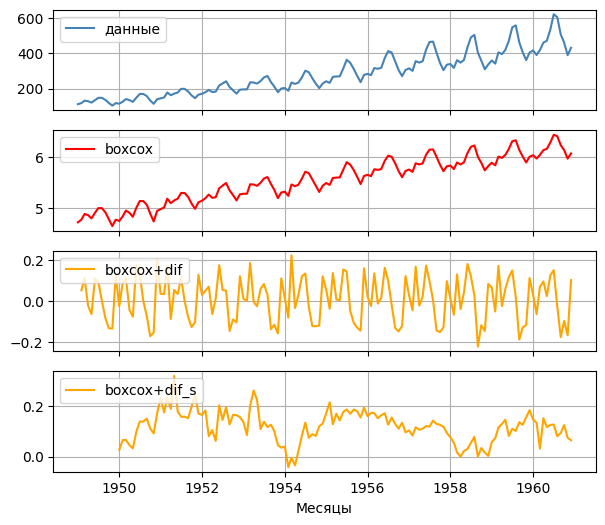

In [21]:
fig,ax = plt.subplots(4,1, figsize = (7,6),sharex=True)
ax[0].plot(df['#Passengers'], label = 'данные', color = 'steelblue')
ax[0].legend(title = '', loc = 'upper left', )
ax[0].grid()

ax[1].plot(df['bcx'], label = 'boxcox', color = 'red')
ax[1].legend(title = '', loc = 'upper left', )
ax[1].grid()

ax[2].plot(df['dif'], label = 'boxcox+dif', color = 'orange')
ax[2].legend(title = '', loc = 'upper left', )
ax[2].grid()

ax[3].plot(df['dif_s'], label = 'boxcox+dif_s', color = 'orange')
ax[3].legend(title = '', loc = 'upper left', )
ax[3].set_xlabel('Месяцы', )
ax[3].grid()

In [22]:
# 3. анализируем автокорреляции подбираем p,q и P,Q

In [23]:
# строим график автокорреляции

# q - номер последнего НЕсезонного лага, при котором автокорреляция значима, но меньше длинны сезона ;
# Q - номер последнего сезонного лага, при котором автокорреляция значима ;

In [24]:
q,Q = 8,1

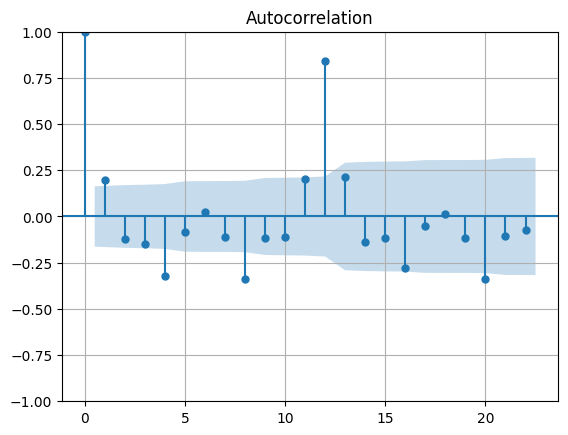

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(df['#Passengers'])
#plot_acf(df['bcx'])
plot_acf(df['dif'].fillna(0.))
plt.grid()
plt.show()

In [26]:
# строим график частичной автокорреляции

# p - номер последнего НЕсезонного лага, при котором автокорреляция значима, но меньше длинны сезона ;
# P - номер последнего сезонного лага, при котором автокорреляция значима ;

In [27]:
p,P = 11,1

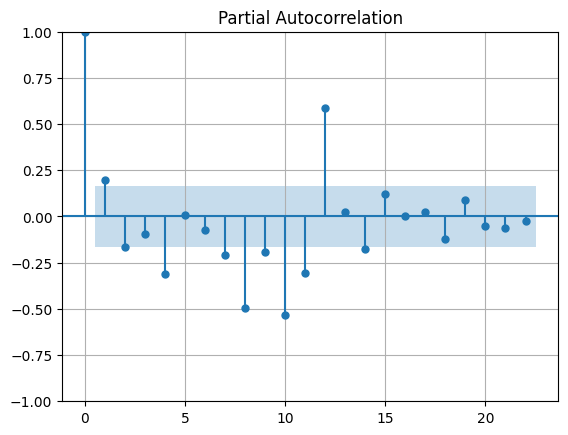

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf
#plot_pacf(df['#Passengers'])
# plot_pacf(df['bcx'])
plot_pacf(df['dif'].fillna(0.))
plt.grid()
plt.show()

# модель

In [29]:
# - обучаем модель 

In [30]:
# разобьём данные на обучающую и тестовую выборки

df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)

# обучающая выборка будет включать данные до декабря 1959 года включительно
train = df[:'1959-12']

# тестовая выборка начнется с января 1960 года (по сути, один год)
test = df['1960-01':]

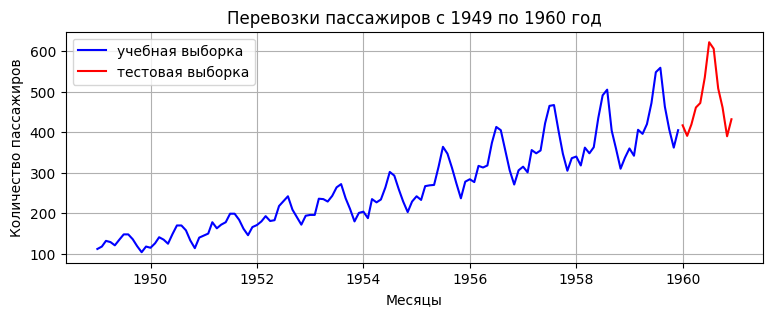

In [31]:
fig,ax = plt.subplots(figsize = (9,3))
ax.plot(train['#Passengers'], color = 'blue',label='учебная выборка')
ax.plot(test['#Passengers'], color = 'red',label='тестовая выборка')
ax.set_xlabel('Месяцы', )
ax.set_ylabel('Количество пассажиров',)
ax.set_title('Перевозки пассажиров с 1949 по 1960 год', )
ax.legend(title = '', loc = 'upper left', )
ax.grid()

In [32]:
%%time 

from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMAX (p,d,q),(P,D,Q)

model = SARIMAX(
        train['bcx'], 
        order = (p, d, q),
        seasonal_order = (P, D, Q, S)
    ).fit() # .fit(method='cg',full_output=True)

/opt/venv/sevgu_1/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.39029D+00    |proj g|=  2.20058D+01

At iterate    5    f= -1.49282D+00    |proj g|=  3.39946D-01

At iterate   10    f= -1.59011D+00    |proj g|=  1.16191D+00

At iterate   15    f= -1.60326D+00    |proj g|=  2.92467D+00

At iterate   20    f= -1.68261D+00    |proj g|=  5.21982D-01

At iterate   25    f= -1.72166D+00    |proj g|=  1.25529D+00

At iterate   30    f= -1.72699D+00    |proj g|=  1.16598D+00

At iterate   35    f= -1.73239D+00    |proj g|=  8.39542D-02

At iterate   40    f= -1.73473D+00    |proj g|=  6.28102D-01

At iterate   45    f= -1.73650D+00    |proj g|=  9.06689D-01

At iterate   50    f= -1.73783D+00    |proj g|=  7.74611D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/venv/sevgu_1/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [33]:
# мы можем посмотреть результат с помощью метода summary()
print(model.summary())

                                       SARIMAX Results                                       
Dep. Variable:                                   bcx   No. Observations:                  132
Model:             SARIMAX(11, 1, 8)x(1, 1, [1], 12)   Log Likelihood                 229.393
Date:                               Tue, 23 Apr 2024   AIC                           -414.786
Time:                                       20:08:14   BIC                           -353.646
Sample:                                   01-01-1949   HQIC                          -389.959
                                        - 12-01-1959                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0048      0.897      0.005      0.996      -1.753       1.763
ar.L2      

# тестируем

In [34]:
# - оцениваем по AIC (критерий Акаике) 

In [35]:
model.aic 

-414.786

In [36]:
from scipy.special import inv_boxcox

start,end  = len(train), len(train)+len(test)-1

# - выполняем обратные преобразования (дифференцирование,логарифмирование) для выдачи прогноза
predicticted = inv_boxcox( model.predict(start, end), 0 )

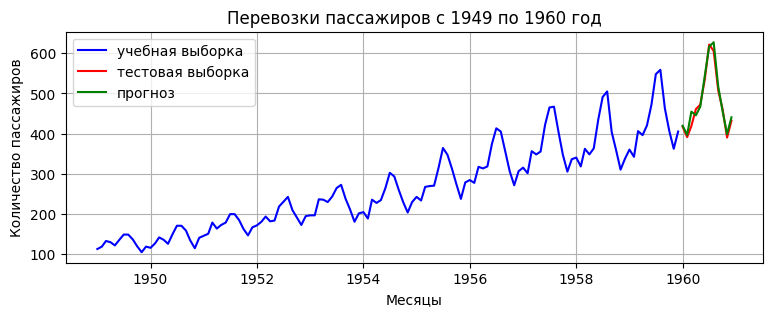

In [37]:
fig,ax = plt.subplots(figsize = (9,3))
ax.plot(train['#Passengers'], color = 'blue',label='учебная выборка')
ax.plot(test['#Passengers'], color = 'red',label='тестовая выборка')
ax.plot(predicticted, color = 'green',  label='прогноз')

ax.set_xlabel('Месяцы', )
ax.set_ylabel('Количество пассажиров',)
ax.set_title('Перевозки пассажиров с 1949 по 1960 год', )
ax.legend(title = '', loc = 'upper left', )
ax.grid()

----

In [38]:
# - оцениваем остатки (разница между прогнозом и тестовыми данными)

In [46]:
from scipy.special import inv_boxcox

start,end  = 0, len(df)
predicticted = inv_boxcox( model.predict(start, end), 0 )

In [47]:
err = df['#Passengers'] - predicticted

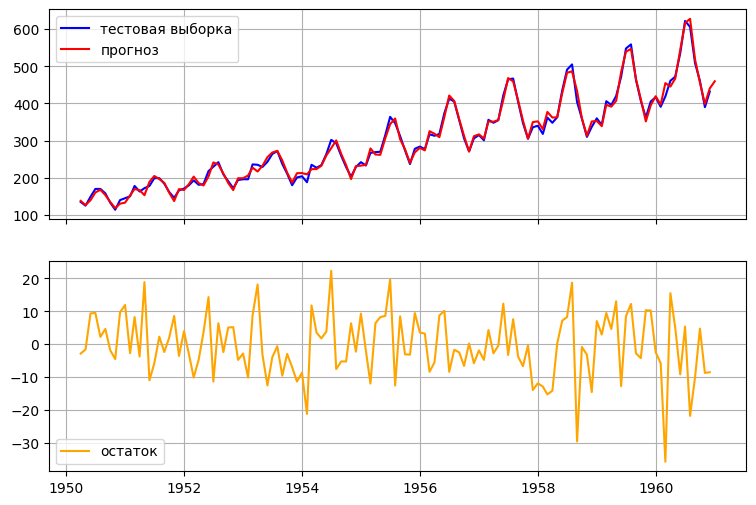

In [52]:
fig,ax = plt.subplots(2,1,figsize = (9,6),sharex=True)
ax[0].plot(df[15:]['#Passengers'], color = 'blue',label='тестовая выборка')
ax[0].plot(predicticted[15:], color = 'red',label='прогноз')
ax[0].grid()
ax[0].legend()
ax[1].plot(err[15:], color = 'orange',label='остаток')
ax[1].grid()
ax[1].legend()


---

In [42]:
# построим прогноз на три года вперед
start, end = len(train), (len(df)-1)+3*12
predicticted = inv_boxcox( model.predict(start, end), 0 )

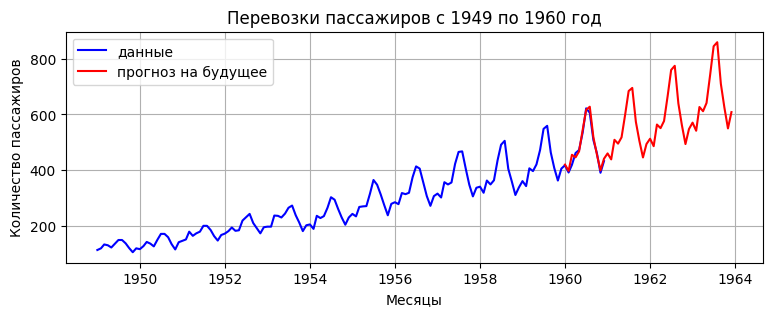

In [43]:
fig,ax = plt.subplots(figsize = (9,3))
ax.plot(df['#Passengers'], color = 'blue',label='данные')
ax.plot(predicticted, color = 'red',label='прогноз на будущее')
ax.set_xlabel('Месяцы', )
ax.set_ylabel('Количество пассажиров',)
ax.set_title('Перевозки пассажиров с 1949 по 1960 год', )
ax.legend(title = '', loc = 'upper left', )
ax.grid()